In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df1 = pd.read_csv('/content/drive/MyDrive/Lab1/200523J_lab1_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Lab1/200523J_lab1_test.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Lab1/expected.csv')

In [109]:
df1_x = df1.drop(columns=["y"])
df1_y = df1["y"]

In [110]:
df2_x = df2
df2_y = df3["y"]

In [111]:
df1_x = df1_x.fillna(np.nan)
df1_y = df1_y.fillna(np.nan)

In [112]:
df2_x.isnull().sum()

x1      7
x2      2
x3     14
x4      0
x5     15
x6      6
x7      6
x8     13
x9      2
x10     4
x11     0
x12     3
x13     0
x14     0
x15    39
dtype: int64

In [113]:
for column in df1_x.columns:
    df1_x[column].fillna(df1_x[column].median(),inplace=True)
    df2_x[column].fillna(df2_x[column].median(),inplace=True)

In [114]:
#lr = LinearRegression()
lr = LogisticRegression()
lr.fit(df1_x,df1_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
df1_y_p=lr.predict(df1_x)
mean_squared_error(df1_y,df1_y_p)

0.7831546707503828

In [116]:
y_pred=lr.predict(df2_x)

In [117]:
r2_score(df2_y,y_pred)

-0.21537946107353578

In [118]:
mean_squared_error(df2_y,y_pred)

1.0134721371708513

In [119]:
rmse = np.sqrt(mean_squared_error(df2_y,y_pred))
rmse

1.0067135328239365

Find missing rows
let's check are there more than 5 missed rows. 

In [120]:
df1_x.shape

(3265, 15)

In [121]:
missing_row = df1_x.isna().sum(axis='columns')
df_missing_rows = df1_x[missing_row < 5].copy()
df_missing_rows.shape 

(3265, 15)

In [122]:
df2_x.shape

(1633, 15)

In [123]:
missing_row = df2_x.isna().sum(axis='columns')
df_missing_rows = df2_x[missing_row < 5].copy()
df_missing_rows.shape 

(1633, 15)

there are no missing rows like mentioned above..so no need to drop rows

replace missed value to median

In [124]:
imputer = SimpleImputer(strategy='median')
df1_x = pd.DataFrame(imputer.fit_transform(df1_x), columns=df1_x.columns)
testX = pd.DataFrame(imputer.transform(df2_x), columns=df2_x.columns)

In [125]:
corelation_matrix = df1_x.corr()  # this is to find corelationship
corelation_matrix

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
x1,1.000000,-0.021121,0.279425,0.093677,0.096410,0.014639,0.037139,-0.044516,-0.370714,-0.021291,0.094186,0.274435,-0.425419,-0.017004,-0.128165
x2,-0.021121,1.000000,-0.156836,0.080450,0.066842,0.038922,0.010418,-0.099574,-0.025244,0.999638,0.079229,0.022735,-0.038810,-0.039680,0.073611
x3,0.279425,-0.156836,1.000000,0.129294,0.091115,0.120643,-0.012840,0.102371,-0.138348,-0.156515,0.128660,0.150550,-0.156153,0.052547,-0.077524
x4,0.093677,0.080450,0.129294,1.000000,0.391992,0.211545,0.018986,0.612543,-0.010431,0.080542,0.995383,0.519471,-0.006675,0.130734,-0.445159
x5,0.096410,0.066842,0.091115,0.391992,1.000000,0.079049,0.026932,0.287638,-0.150410,0.067281,0.394299,0.837429,-0.185528,-0.027999,-0.440477
x6,0.014639,0.038922,0.120643,0.211545,0.079049,1.000000,-0.006856,0.125710,-0.068676,0.039207,0.212219,0.253545,-0.080090,0.000304,-0.364327
x7,0.037139,0.010418,-0.012840,0.018986,0.026932,-0.006856,1.000000,0.008938,-0.014915,0.010428,0.019062,0.018002,-0.017013,0.002411,0.010632
x8,-0.044516,-0.099574,0.102371,0.612543,0.287638,0.125710,0.008938,1.000000,-0.016068,-0.099617,0.615657,0.288871,-0.010349,0.056331,-0.256512
x9,-0.370714,-0.025244,-0.138348,-0.010431,-0.150410,-0.068676,-0.014915,-0.016068,1.000000,-0.025051,-0.008972,-0.076194,0.867715,0.133297,0.114384
x10,-0.021291,0.999638,-0.156515,0.080542,0.067281,0.039207,0.010428,-0.099617,-0.025051,1.000000,0.079324,0.023401,-0.038566,-0.039275,0.072940


In [126]:
corelation_matrix = df2_x.corr()  # this is to find corelationship
corelation_matrix

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
x1,1.000000,-0.026195,0.310847,0.084399,0.067013,0.042116,0.007028,-0.061923,-0.273688,-0.021781,0.084399,0.245460,-0.427241,-0.017460,-0.107098
x2,-0.026195,1.000000,-0.128227,0.110525,0.062203,0.132987,-0.002181,-0.088234,-0.016985,0.994678,0.110525,0.033097,-0.017949,-0.027835,0.037919
x3,0.310847,-0.128227,1.000000,0.105506,0.100570,0.102909,0.083424,0.072007,-0.109642,-0.124793,0.105506,0.147461,-0.179693,0.086320,-0.066247
x4,0.084399,0.110525,0.105506,1.000000,0.403602,0.172324,0.015674,0.609863,-0.011177,0.098052,1.000000,0.540861,0.016964,0.144854,-0.435505
x5,0.067013,0.062203,0.100570,0.403602,1.000000,0.104234,0.035278,0.307046,-0.138469,0.063186,0.403602,0.829932,-0.209881,-0.035069,-0.450202
x6,0.042116,0.132987,0.102909,0.172324,0.104234,1.000000,-0.010396,0.056591,-0.075970,0.133547,0.172324,0.265292,-0.109610,0.048468,-0.343723
x7,0.007028,-0.002181,0.083424,0.015674,0.035278,-0.010396,1.000000,0.015088,-0.011651,-0.002104,0.015674,0.029508,-0.018305,-0.027569,-0.023313
x8,-0.061923,-0.088234,0.072007,0.609863,0.307046,0.056591,0.015088,1.000000,0.001767,-0.112470,0.609863,0.298578,0.016160,0.061829,-0.226551
x9,-0.273688,-0.016985,-0.109642,-0.011177,-0.138469,-0.075970,-0.011651,0.001767,1.000000,-0.022763,-0.011177,-0.072031,0.608518,0.129525,0.068807
x10,-0.021781,0.994678,-0.124793,0.098052,0.063186,0.133547,-0.002104,-0.112470,-0.022763,1.000000,0.098052,0.033156,-0.028520,-0.030968,0.036284


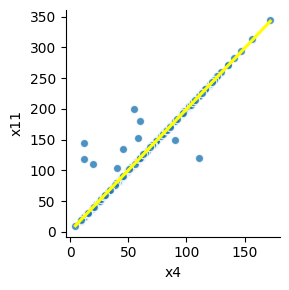

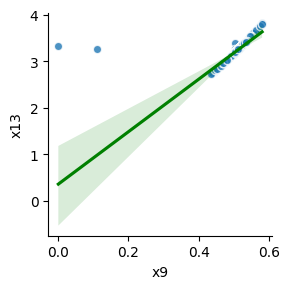

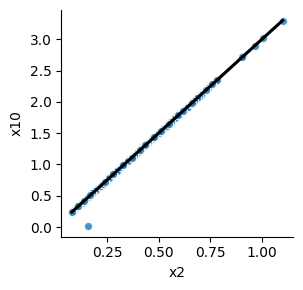

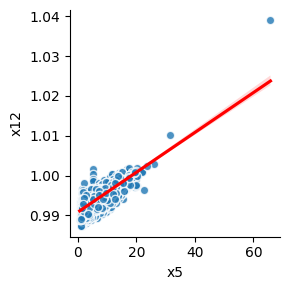

In [127]:
import seaborn as sns
sns.lmplot(x='x4' , y='x11', data=df1_x, scatter_kws={"edgecolor": 'w'},height=3,line_kws={"color": 'yellow'});

sns.lmplot(x='x9' , y='x13', data=df1_x, scatter_kws={"edgecolor": 'w'},height=3,line_kws={"color": 'green'});
sns.lmplot(x='x2' , y='x10', data=df1_x, scatter_kws={"edgecolor": 'w'},height=3,line_kws={"color": 'black'});

sns.lmplot(x='x5' , y='x12', data=df1_x, scatter_kws={"edgecolor": 'w'},height=3,line_kws={"color": 'red'});

There are higly corelated feutures..lets remove them

In [128]:
df2_x = df2_x.drop(columns=["x9","x2","x11","x10"])
df1_x = df1_x.drop(columns=["x9","x2","x11","x10"])
df1_x.head()

,x1,x3,x4,x5,x6,x7,x8,x12,x13,x14,x15
0,5.2,0.37,66.5,6.2,0.031,0.995369,42.0,0.99076,3.25,0.41,12.5
1,6.1,0.00,43.5,1.6,0.063,0.995691,36.0,0.99140,3.27,0.67,10.8
2,7.5,0.30,46.0,4.6,0.027,0.995414,29.0,0.99085,3.15,0.38,12.0
3,7.4,0.29,50.0,1.7,0.047,0.996208,16.0,0.99243,3.28,0.45,10.6
4,7.3,0.24,43.0,0.9,0.031,0.994616,29.0,0.98926,2.90,0.38,12.2


Distribution of the data

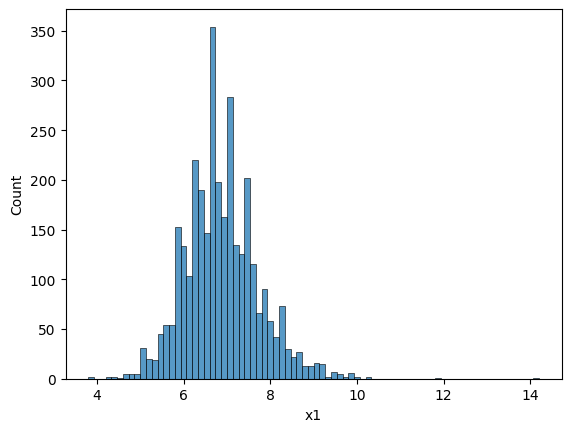

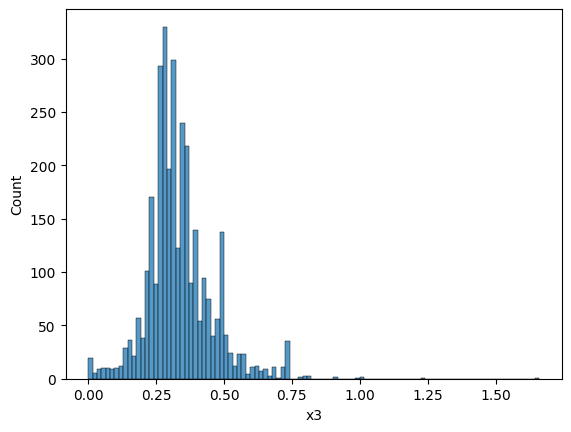

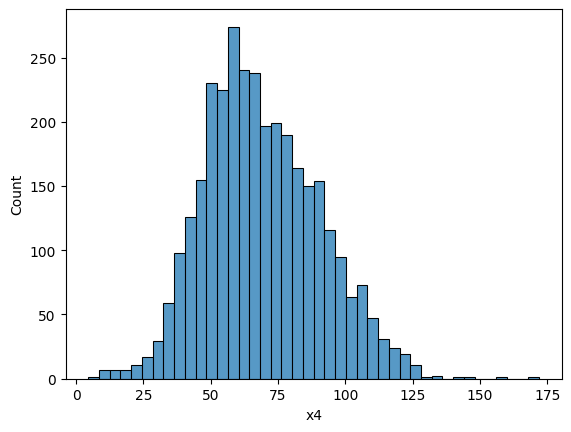

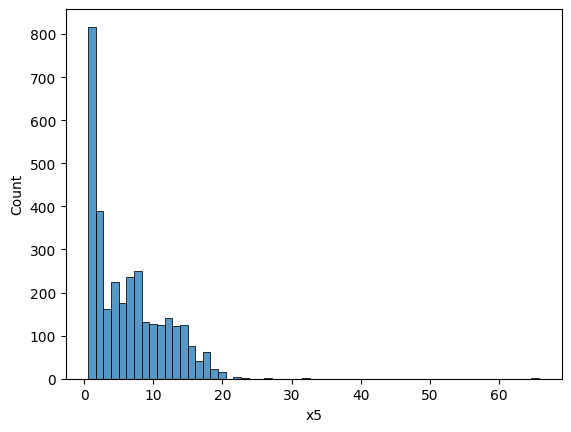

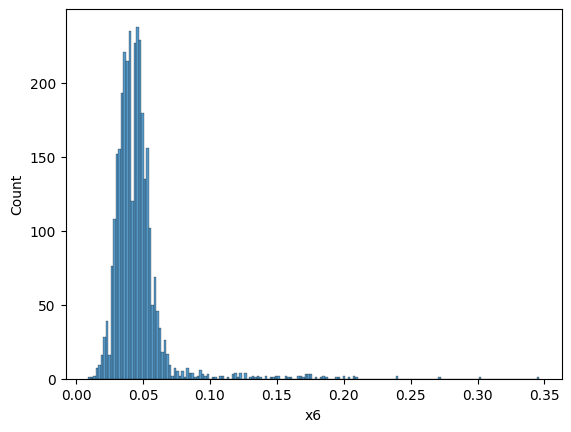

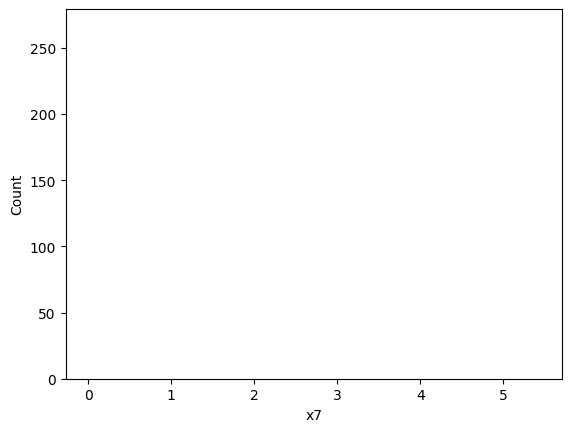

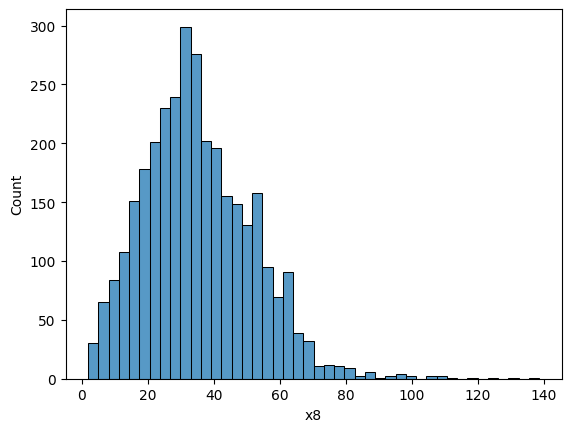

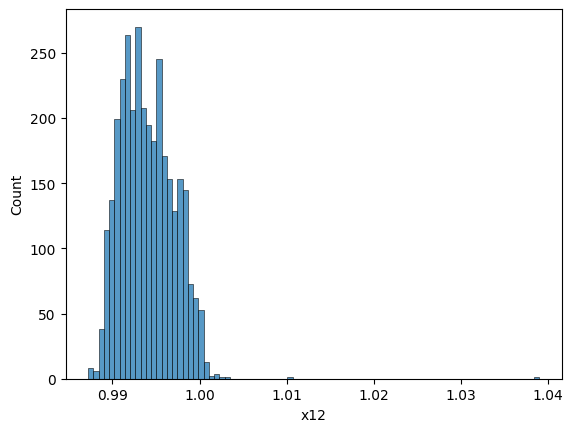

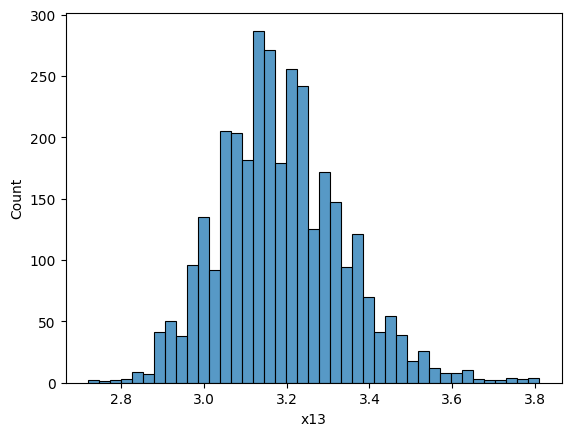

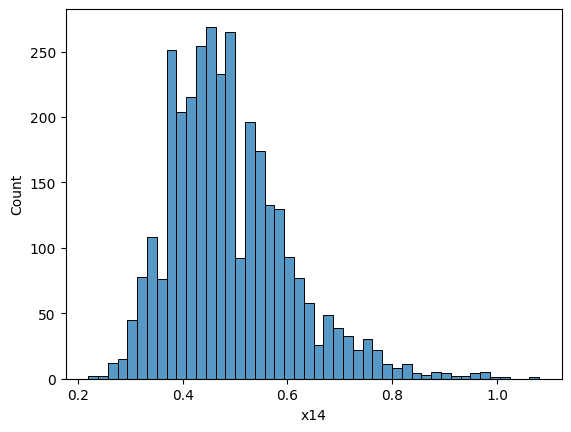

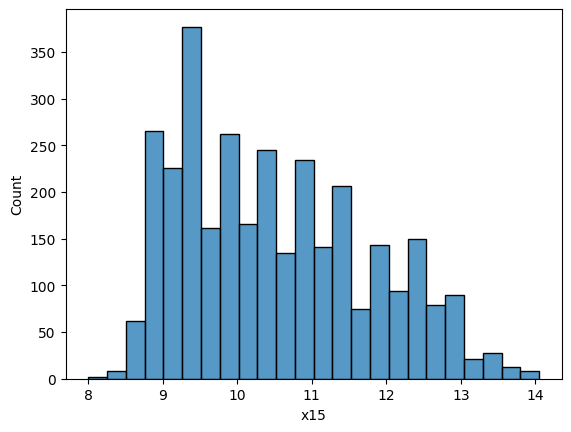

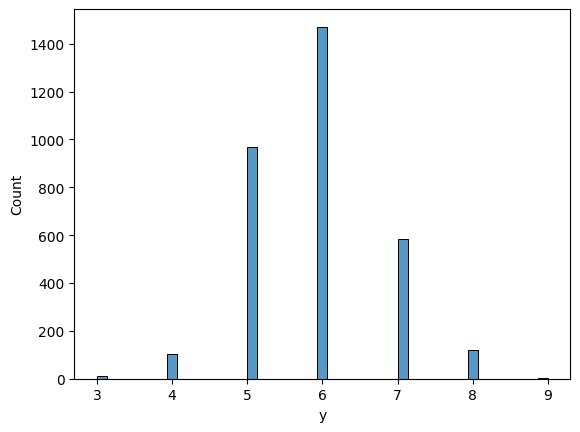

In [129]:
for feature in df1_x:
  sns.histplot(df1[feature])
  plt.show()
sns.histplot(df1_y)
plt.show()

In [130]:
mutualinfo_scores = mutual_info_regression(df1_x,df1_y)
mutualinfo_scores = pd.Series(mutualinfo_scores, name="MI Scores", index=df1_x.columns)
mutualinfo_scores = mutualinfo_scores.sort_values(ascending=False)
mutualinfo_scores

x12    0.167868
x7     0.166685
x15    0.152935
x4     0.098214
x5     0.077342
x8     0.070396
x6     0.069566
x3     0.048271
x1     0.028854
x14    0.020550
x13    0.012969
Name: MI Scores, dtype: float64

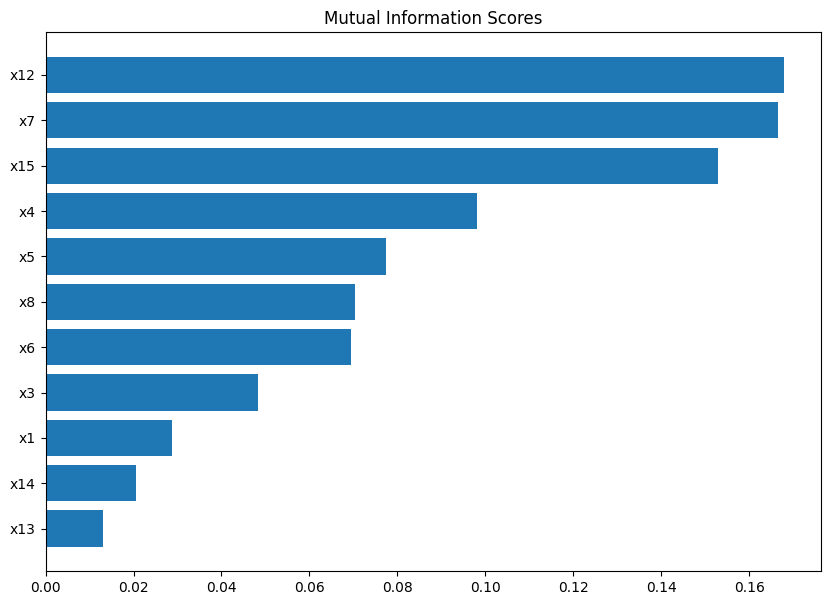

In [131]:
def plot_Mutualinfo_scores(score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width, score)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 7))
plot_Mutualinfo_scores(mutualinfo_scores)

In [132]:
lr = LogisticRegression(max_iter=1000)
lr.fit(df1_x,df1_y)
df1_y_predict=lr.predict(df2_x)
accuracy_score(df3,df1_y_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.40906307409675446

In [133]:
y_predict=lr.predict(df2_x)

In [134]:
mse=mean_squared_error(df3,df1_y_predict)
mse

1.0777709736680956

In [135]:
mseroot = np.sqrt(mse)
mseroot

1.0381574898193895